In [3]:
import pandas as pd
data = pd.read_pickle("/Users/angie 1/anflag/Workspace/code/data/test/201802")
data.head()

,supply_unit,B,user_id,chaobiaoduan,station,regions,address,fee,flat_power,valley_power,bill_post_time,payment_time,channel,location,Lng,Lat
0,沪东营销分中心,6.416346e+09,1226239768,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄4号2202室,60.1,86.0,23.0,20180206.0,2018-02-23 09:38:30,支付宝,上海市虹口区物华路118弄,121.5,31.265
1,沪东营销分中心,6.416346e+09,1226238000,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号2004室,536.0,701.0,337.0,20180206.0,2018-02-21 17:51:21,付费通,上海市虹口区物华路118弄,121.5,31.265
2,沪东营销分中心,6.416345e+09,1226237443,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号604室,126.1,179.0,51.0,20180206.0,2018-02-06 15:25:39,支付宝,上海市虹口区物华路118弄,121.5,31.265
3,沪东营销分中心,6.416345e+09,1226237430,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号603室,131.5,128.0,171.0,20180206.0,2018-02-06 17:38:07,支付宝,上海市虹口区物华路118弄,121.5,31.265
4,沪东营销分中心,6.416355e+09,1226625666,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄5号2101室,25.8,561.0,238.0,20180206.0,2018-02-06 13:58:14,九龙抄表班,上海市虹口区物华路118弄,121.5,31.265


In [4]:
data['payment_time_2'] = pd.to_datetime(data['payment_time'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7627111 entries, 0 to 7627110
Data columns (total 17 columns):
supply_unit       object
B                 float64
user_id           int64
chaobiaoduan      object
station           object
regions           object
address           object
fee               float64
flat_power        float64
valley_power      float64
bill_post_time    float64
payment_time      object
channel           object
location          object
Lng               float64
Lat               float64
payment_time_2    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1), object(8)
memory usage: 1.0+ GB


In [6]:
# 统计每一列有多少缺失值
data.isnull().sum()

supply_unit             0
B                       0
user_id                 0
chaobiaoduan            0
station           2080030
regions              1850
address                 0
fee                     0
flat_power            197
valley_power         1421
bill_post_time          0
payment_time          373
channel             14596
location                0
Lng                     0
Lat                     0
payment_time_2        373
dtype: int64

In [18]:
data["payment_time_year"] = data['payment_time_2'].map(lambda x: x.year)
data["payment_time_month"] = data['payment_time_2'].map(lambda x: x.month)
data["payment_time_day"] = data['payment_time_2'].map(lambda x: x.day)
data.head(1)

,supply_unit,B,user_id,chaobiaoduan,station,regions,address,fee,flat_power,valley_power,bill_post_time,payment_time,channel,location,Lng,Lat,payment_time_2,payment_time_year,payment_time_month,payment_time_day
0,沪东营销分中心,6.416346e+09,1226239768,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄4号2202室,60.1,86.0,23.0,20180206.0,2018-02-23 09:38:30,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-23 09:38:30,2018.0,2.0,23.0


In [19]:
# pandas 取出某一列的数值是缺失值的行
nopay_data = data[data['payment_time_year'].isnull()]

In [20]:
nopay_data.head()

,supply_unit,B,user_id,chaobiaoduan,station,regions,address,fee,flat_power,valley_power,bill_post_time,payment_time,channel,location,Lng,Lat,payment_time_2,payment_time_year,payment_time_month,payment_time_day
30825,沪东营销分中心,6.419119e+09,114033813,A44231,市区控江,杨浦区,国权路95弄14号901室,0.0,0.0,0.0,20180209.0,NaN,NaN,上海市国权路95弄,121.523,31.292,NaT,NaN,NaN,NaN
38757,沪东营销分中心,6.419120e+09,111059664,A44621,市区控江,杨浦区,国顺路117弄35号502室,0.0,0.0,0.0,20180209.0,NaN,NaN,上海市国顺路117弄,121.522,31.295,NaT,NaN,NaN,NaN
57177,沪东营销分中心,6.417408e+09,60261584,A645B1,市区控江,杨浦区,翔殷路995号1005室,0.0,0.0,0.0,20180207.0,NaN,NaN,上海市翔殷路995号,121.528,31.306,NaT,NaN,NaN,NaN
57178,沪东营销分中心,6.417408e+09,60261640,A645B1,市区控江,杨浦区,翔殷路995号2201室,0.0,0.0,0.0,20180207.0,NaN,NaN,上海市翔殷路995号,121.528,31.306,NaT,NaN,NaN,NaN
80415,沪东营销分中心,6.411056e+09,60223635,AL28J2,市区九龙,虹口区,欧阳路555弄8号1706室,0.0,0.0,0.0,20180204.0,NaN,NaN,上海市欧阳路555弄,121.494,31.280,NaT,NaN,NaN,NaN


In [21]:
nopay_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 30825 to 7579228
Data columns (total 20 columns):
supply_unit           373 non-null object
B                     373 non-null float64
user_id               373 non-null int64
chaobiaoduan          373 non-null object
station               333 non-null object
regions               373 non-null object
address               373 non-null object
fee                   373 non-null float64
flat_power            363 non-null float64
valley_power          367 non-null float64
bill_post_time        373 non-null float64
payment_time          0 non-null object
channel               0 non-null object
location              373 non-null object
Lng                   373 non-null float64
Lat                   373 non-null float64
payment_time_2        0 non-null datetime64[ns]
payment_time_year     0 non-null float64
payment_time_month    0 non-null float64
payment_time_day      0 non-null float64
dtypes: datetime64[ns](1), float64(10), in

In [44]:
data2 = data.copy()
data2.describe()

,B,user_id,fee,flat_power,valley_power,bill_post_time,Lng,Lat,payment_time_year,payment_time_month,payment_time_day
count,7.627111e+06,7.627111e+06,7.627111e+06,7.626914e+06,7.625690e+06,7.627111e+06,7.627111e+06,7.627111e+06,7626738.0,7.626738e+06,7.626738e+06
mean,6.413856e+09,5.568985e+08,1.920880e+02,2.533291e+02,1.097078e+02,2.018021e+07,1.211239e+02,3.111862e+01,2018.0,2.189020e+00,1.499549e+01
std,2.996518e+06,1.245708e+09,2.385047e+02,2.736717e+02,1.413544e+02,1.341586e+00,6.367806e+00,1.682341e+00,0.0,4.078880e-01,7.789164e+00
min,6.408581e+09,1.000000e+00,-3.140400e+03,-3.013000e+03,-2.570000e+03,2.018020e+07,-1.000000e+00,-1.000000e+00,2018.0,2.000000e+00,1.000000e+00
25%,6.411226e+09,6.163646e+07,6.940000e+01,9.300000e+01,2.700000e+01,2.018020e+07,1.213830e+02,3.113000e+01,2018.0,2.000000e+00,9.000000e+00
50%,6.413860e+09,1.413022e+08,1.358000e+02,1.820000e+02,6.300000e+01,2.018020e+07,1.214580e+02,3.122100e+01,2018.0,2.000000e+00,1.300000e+01
75%,6.416391e+09,2.310294e+08,2.452000e+02,3.270000e+02,1.400000e+02,2.018021e+07,1.215330e+02,3.128700e+01,2018.0,2.000000e+00,2.300000e+01
max,6.462511e+09,8.000120e+09,2.973340e+04,2.502000e+04,1.086000e+04,2.018023e+07,1.293980e+02,4.824500e+01,2018.0,1.100000e+01,3.100000e+01


In [22]:
nopay_data.isnull().sum()

supply_unit             0
B                       0
user_id                 0
chaobiaoduan            0
station                40
regions                 0
address                 0
fee                     0
flat_power             10
valley_power            6
bill_post_time          0
payment_time          373
channel               373
location                0
Lng                     0
Lat                     0
payment_time_2        373
payment_time_year     373
payment_time_month    373
payment_time_day      373
dtype: int64

In [23]:
notna_date_data = data[data['payment_time'].notna()]
notna_date_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7626738 entries, 0 to 7627110
Data columns (total 20 columns):
supply_unit           object
B                     float64
user_id               int64
chaobiaoduan          object
station               object
regions               object
address               object
fee                   float64
flat_power            float64
valley_power          float64
bill_post_time        float64
payment_time          object
channel               object
location              object
Lng                   float64
Lat                   float64
payment_time_2        datetime64[ns]
payment_time_year     float64
payment_time_month    float64
payment_time_day      float64
dtypes: datetime64[ns](1), float64(10), int64(1), object(8)
memory usage: 1.2+ GB


In [24]:
notna_date_data.isnull().sum()

supply_unit                 0
B                           0
user_id                     0
chaobiaoduan                0
station               2079990
regions                  1850
address                     0
fee                         0
flat_power                187
valley_power             1415
bill_post_time              0
payment_time                0
channel                 14223
location                    0
Lng                         0
Lat                         0
payment_time_2              0
payment_time_year           0
payment_time_month          0
payment_time_day            0
dtype: int64

In [25]:
# 根据df的多列组成完整的时间索引(PeriodIndex)
notna_date_data["payment_time_date"] = pd.PeriodIndex(year=notna_date_data["payment_time_year"], month=notna_date_data["payment_time_month"], day=notna_date_data["payment_time_day"], freq="D")
notna_date_data.head()

/Users/Shared/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,supply_unit,B,user_id,chaobiaoduan,station,regions,address,fee,flat_power,valley_power,...,payment_time,channel,location,Lng,Lat,payment_time_2,payment_time_year,payment_time_month,payment_time_day,payment_time_date
0,沪东营销分中心,6.416346e+09,1226239768,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄4号2202室,60.1,86.0,23.0,...,2018-02-23 09:38:30,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-23 09:38:30,2018.0,2.0,23.0,2018-02-23
1,沪东营销分中心,6.416346e+09,1226238000,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号2004室,536.0,701.0,337.0,...,2018-02-21 17:51:21,付费通,上海市虹口区物华路118弄,121.5,31.265,2018-02-21 17:51:21,2018.0,2.0,21.0,2018-02-21
2,沪东营销分中心,6.416345e+09,1226237443,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号604室,126.1,179.0,51.0,...,2018-02-06 15:25:39,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 15:25:39,2018.0,2.0,6.0,2018-02-06
3,沪东营销分中心,6.416345e+09,1226237430,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号603室,131.5,128.0,171.0,...,2018-02-06 17:38:07,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 17:38:07,2018.0,2.0,6.0,2018-02-06
4,沪东营销分中心,6.416355e+09,1226625666,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄5号2101室,25.8,561.0,238.0,...,2018-02-06 13:58:14,九龙抄表班,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 13:58:14,2018.0,2.0,6.0,2018-02-06


In [65]:
from dateutil.parser import parse
import time 
def FloatToTime(a):
    b=int(a)
    c = str(b)
    y = c[0:4]
    m = c[4:6]
    d = c[6:8]
    ymd = y + '-' + m +  '-' + d
    ymd = pd.to_datetime(ymd)
    return ymd

data['bill_post_time_2'] = list(map(FloatToTime, data['bill_post_time']))

In [99]:
# map(lambda x, y: x + y, [1, 3, 5, 7, 9], [2, 4, 6, 8, 10])
data['pay_days'] = list(map(lambda x, y: (x-y).days, data['payment_time_2'], data['bill_post_time_2'] ))
data.head()

,supply_unit,B,user_id,chaobiaoduan,station,regions,address,fee,flat_power,valley_power,...,channel,location,Lng,Lat,payment_time_2,payment_time_year,payment_time_month,payment_time_day,bill_post_time_2,pay_days
0,沪东营销分中心,6.416346e+09,1226239768,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄4号2202室,60.1,86.0,23.0,...,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-23 09:38:30,2018.0,2.0,23.0,2018-02-06,17.0
1,沪东营销分中心,6.416346e+09,1226238000,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号2004室,536.0,701.0,337.0,...,付费通,上海市虹口区物华路118弄,121.5,31.265,2018-02-21 17:51:21,2018.0,2.0,21.0,2018-02-06,15.0
2,沪东营销分中心,6.416345e+09,1226237443,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号604室,126.1,179.0,51.0,...,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 15:25:39,2018.0,2.0,6.0,2018-02-06,0.0
3,沪东营销分中心,6.416345e+09,1226237430,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄3号603室,131.5,128.0,171.0,...,支付宝,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 17:38:07,2018.0,2.0,6.0,2018-02-06,0.0
4,沪东营销分中心,6.416355e+09,1226625666,A135G6,市区九龙,虹口区,上海市虹口区物华路118弄5号2101室,25.8,561.0,238.0,...,九龙抄表班,上海市虹口区物华路118弄,121.5,31.265,2018-02-06 13:58:14,2018.0,2.0,6.0,2018-02-06,0.0


In [67]:
data.describe()

,B,user_id,fee,flat_power,valley_power,bill_post_time,Lng,Lat,payment_time_year,payment_time_month,payment_time_day,pay_days
count,7.627111e+06,7.627111e+06,7.627111e+06,7.626914e+06,7.625690e+06,7.627111e+06,7.627111e+06,7.627111e+06,7626738.0,7.626738e+06,7.626738e+06,7.626738e+06
mean,6.413856e+09,5.568985e+08,1.920880e+02,2.533291e+02,1.097078e+02,2.018021e+07,1.211239e+02,3.111862e+01,2018.0,2.189020e+00,1.499549e+01,1.470059e+01
std,2.996518e+06,1.245708e+09,2.385047e+02,2.736717e+02,1.413544e+02,1.341586e+00,6.367806e+00,1.682341e+00,0.0,4.078880e-01,7.789164e+00,1.105778e+01
min,6.408581e+09,1.000000e+00,-3.140400e+03,-3.013000e+03,-2.570000e+03,2.018020e+07,-1.000000e+00,-1.000000e+00,2018.0,2.000000e+00,1.000000e+00,0.000000e+00
25%,6.411226e+09,6.163646e+07,6.940000e+01,9.300000e+01,2.700000e+01,2.018020e+07,1.213830e+02,3.113000e+01,2018.0,2.000000e+00,9.000000e+00,6.000000e+00
50%,6.413860e+09,1.413022e+08,1.358000e+02,1.820000e+02,6.300000e+01,2.018020e+07,1.214580e+02,3.122100e+01,2018.0,2.000000e+00,1.300000e+01,1.500000e+01
75%,6.416391e+09,2.310294e+08,2.452000e+02,3.270000e+02,1.400000e+02,2.018021e+07,1.215330e+02,3.128700e+01,2018.0,2.000000e+00,2.300000e+01,2.100000e+01
max,6.462511e+09,8.000120e+09,2.973340e+04,2.502000e+04,1.086000e+04,2.018023e+07,1.293980e+02,4.824500e+01,2018.0,1.100000e+01,3.100000e+01,2.930000e+02


In [72]:
# pandas 取出某一列的数值是缺失值的行
nopay_data = data[data['payment_time_year'].isnull()]

In [100]:
notna_date_data = data[data['payment_time'].notna()]
notna_date_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7626738 entries, 0 to 7627110
Data columns (total 22 columns):
supply_unit           object
B                     float64
user_id               int64
chaobiaoduan          object
station               object
regions               object
address               object
fee                   float64
flat_power            float64
valley_power          float64
bill_post_time        float64
payment_time          object
channel               object
location              object
Lng                   float64
Lat                   float64
payment_time_2        datetime64[ns]
payment_time_year     float64
payment_time_month    float64
payment_time_day      float64
bill_post_time_2      datetime64[ns]
pay_days              float64
dtypes: datetime64[ns](2), float64(11), int64(1), object(8)
memory usage: 1.3+ GB


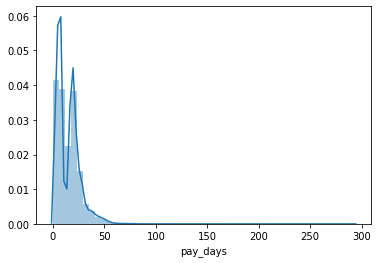

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(notna_date_data['pay_days'])

In [78]:
# 使用函数counter,快速获取list中每个元素出现的次数
from collections import Counter

def counter(arr):
    return Counter(arr)

print(counter(notna_date_data['pay_days']))

Counter({4.0: 706670, 8.0: 587775, 9.0: 389205, 19.0: 374462, 18.0: 360971, 20.0: 335010, 7.0: 304321, 17.0: 276912, 5.0: 272190, 15.0: 262721, 3.0: 259652, 16.0: 257743, 6.0: 257072, 21.0: 226092, 22.0: 220495, 1.0: 213798, 2.0: 213025, 23.0: 199506, 0.0: 190941, 24.0: 180546, 10.0: 137614, 25.0: 126874, 26.0: 117826, 28.0: 90049, 29.0: 89595, 14.0: 87675, 27.0: 81476, 13.0: 65613, 30.0: 65264, 11.0: 63577, 12.0: 55866, 31.0: 55720, 32.0: 35589, 33.0: 33986, 34.0: 32094, 35.0: 31448, 36.0: 31218, 37.0: 30421, 38.0: 28599, 39.0: 26106, 40.0: 23457, 41.0: 21496, 42.0: 20009, 43.0: 18619, 44.0: 16781, 45.0: 16623, 46.0: 15444, 47.0: 14194, 48.0: 14050, 49.0: 12068, 50.0: 11183, 51.0: 8923, 52.0: 7641, 53.0: 6753, 54.0: 5486, 55.0: 5061, 56.0: 4359, 57.0: 3488, 58.0: 2665, 59.0: 1606, 63.0: 1405, 60.0: 1361, 61.0: 1331, 62.0: 1283, 64.0: 1206, 65.0: 1150, 66.0: 1035, 67.0: 943, 69.0: 922, 70.0: 879, 68.0: 832, 71.0: 820, 77.0: 782, 72.0: 669, 78.0: 659, 79.0: 654, 73.0: 601, 76.0: 521, 75

In [80]:
notna_date_data.to_pickle('2018_notna_date_data.pkl')

In [81]:
nopay_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 30825 to 7579228
Data columns (total 22 columns):
supply_unit           373 non-null object
B                     373 non-null float64
user_id               373 non-null int64
chaobiaoduan          373 non-null object
station               333 non-null object
regions               373 non-null object
address               373 non-null object
fee                   373 non-null float64
flat_power            363 non-null float64
valley_power          367 non-null float64
bill_post_time        373 non-null float64
payment_time          0 non-null object
channel               0 non-null object
location              373 non-null object
Lng                   373 non-null float64
Lat                   373 non-null float64
payment_time_2        0 non-null datetime64[ns]
payment_time_year     0 non-null float64
payment_time_month    0 non-null float64
payment_time_day      0 non-null float64
bill_post_time_2      373 non-null datetim

In [82]:
nopay_data.to_pickle('201802_nopay_data.pkl')

In [83]:
data.to_pickle('201802_data.pkl')

TypeError: '<' not supported between instances of 'Counter' and 'float'

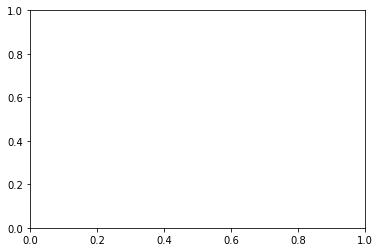

In [114]:
import os
from numpy import array
import numpy as np
import pylab as pl

def draw_hist(lenths):  #lenths 接受的其实是 sizeArry传来的数组 就是def get_data(lines) 返回的数据
    data = lenths 

# 对数据进行切片，将数据按照从最小值到最大值分组，分成30组
    bins = np.linspace(min(data),max(data),30)

# 这个是调用画直方图的函数，意思是把数据按照从bins的分割来画
    pl.hist(data,bins)
#设置出横坐标
    pl.xlabel('pay_days')
#设置纵坐标的标题
    pl.ylabel('number')
#设置整个图片的标题
    pl.title('201802')
# 展示出我们的图片
    pl.show()

pay_days_arr = counter(notna_date_data['pay_days'])
draw_hist(pay_days_arr)

In [123]:
notna_date_data['pay_days'].max()

293.0

In [124]:
notna_date_data['pay_days'].min()

0.0

In [121]:
pay_days_arr = notna_date_data['pay_days'].astype(int)

In [122]:
pay_days_arr

0          17
1          15
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          2
22          2
23          2
24          2
25          2
26          2
27          2
28          2
29          3
           ..
7627081    15
7627082    15
7627083    16
7627084    20
7627085    20
7627086    22
7627087    40
7627088    16
7627089    38
7627090    15
7627091    17
7627092    15
7627093    16
7627094    20
7627095    20
7627096    16
7627097    24
7627098    50
7627099    15
7627100    15
7627101    27
7627102    46
7627103    16
7627104    16
7627105    16
7627106    16
7627107    24
7627108    25
7627109    25
7627110    25
Name: pay_days, Length: 7626738, dtype: int64

In [132]:
# 使用函数counter,快速获取list中每个元素出现的次数
from collections import Counter

def counter(arr):
    return Counter(arr)

print(counter(pay_days_arr))

Counter({4: 706670, 8: 587775, 9: 389205, 19: 374462, 18: 360971, 20: 335010, 7: 304321, 17: 276912, 5: 272190, 15: 262721, 3: 259652, 16: 257743, 6: 257072, 21: 226092, 22: 220495, 1: 213798, 2: 213025, 23: 199506, 0: 190941, 24: 180546, 10: 137614, 25: 126874, 26: 117826, 28: 90049, 29: 89595, 14: 87675, 27: 81476, 13: 65613, 30: 65264, 11: 63577, 12: 55866, 31: 55720, 32: 35589, 33: 33986, 34: 32094, 35: 31448, 36: 31218, 37: 30421, 38: 28599, 39: 26106, 40: 23457, 41: 21496, 42: 20009, 43: 18619, 44: 16781, 45: 16623, 46: 15444, 47: 14194, 48: 14050, 49: 12068, 50: 11183, 51: 8923, 52: 7641, 53: 6753, 54: 5486, 55: 5061, 56: 4359, 57: 3488, 58: 2665, 59: 1606, 63: 1405, 60: 1361, 61: 1331, 62: 1283, 64: 1206, 65: 1150, 66: 1035, 67: 943, 69: 922, 70: 879, 68: 832, 71: 820, 77: 782, 72: 669, 78: 659, 79: 654, 73: 601, 76: 521, 75: 473, 74: 470, 80: 447, 81: 183, 89: 165, 85: 134, 82: 130, 87: 127, 83: 112, 84: 110, 88: 100, 86: 95, 90: 94, 108: 60, 114: 52, 109: 49, 111: 48, 112: 47

In [125]:
pay_days_arr.max()

293

In [2]:
d = 10
bin_nums = (pay_days_arr.max() - pay_days_arr.min()) // d
print(bin_nums)
bin_nums.astype(np.int8)
print(bin_nums)
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(pay_days_arr, bin_nums)
plt.show()

NameError: name 'pay_days_arr' is not defined

In [127]:
# counter中key组成的list
list(pay_days_arr)

[17,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 12,
 12,
 11,
 11,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 15,
 13,
 13,
 10,
 10,
 10,
 10,
 10,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,


In [129]:
# 继承自字典的.values()方法返回values的列表
counter_pay_days.values()

dict_values([276912, 262721, 190941, 213798, 213025, 259652, 706670, 272190, 257072, 304321, 587775, 389205, 55866, 63577, 87675, 65613, 137614, 257743, 360971, 335010, 374462, 226092, 199506, 220495, 180546, 126874, 89595, 117826, 81476, 90049, 32094, 65264, 21496, 33986, 15444, 14194, 28599, 5486, 23457, 35589, 31448, 11183, 4359, 16623, 16781, 30421, 12068, 6753, 20009, 26106, 3488, 55720, 31218, 8923, 18619, 1283, 5061, 473, 30, 7641, 14050, 1206, 112, 33, 832, 659, 879, 1405, 1035, 447, 782, 943, 1331, 521, 2665, 36, 669, 1606, 820, 1150, 922, 183, 52, 601, 1361, 27, 470, 32, 19, 48, 4, 34, 60, 22, 165, 47, 130, 17, 654, 18, 18, 18, 24, 14, 19, 127, 134, 47, 29, 31, 29, 43, 49, 94, 41, 110, 29, 100, 7, 11, 8, 27, 10, 30, 23, 8, 23, 15, 37, 95, 31, 5, 29, 1, 18, 27, 3, 17, 6, 13, 12, 7, 43, 6, 6, 2, 1, 7, 7, 9, 6, 3, 7, 9, 4, 4, 3, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 4, 1, 1, 1, 2, 1, 5, 1, 2, 1, 2, 1, 1, 1, 3, 2, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

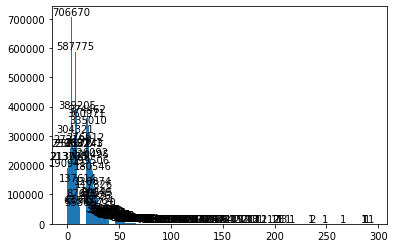

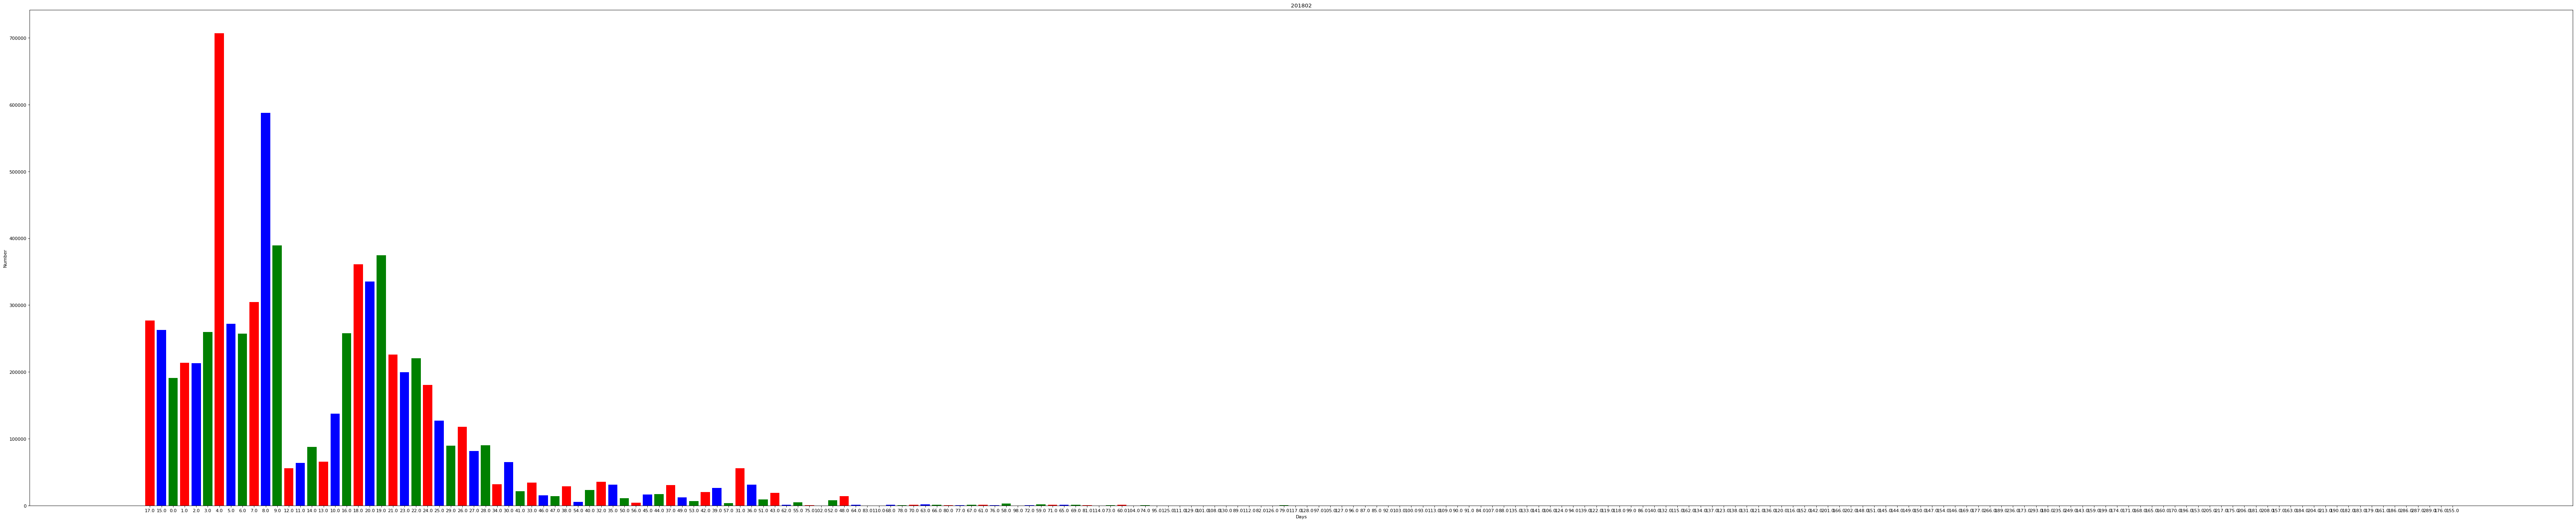

In [131]:
# -*- coding: utf-8 -*-
'''

time:2019-8-21
author:Bing
'''
import matplotlib.pyplot as plt
 
#num_list = [1.5,0.6,7.8,6]
fig, ax = plt.subplots()
# num_list = [7870,81937,17529598,6225227]
# name_list = ['Eviction','Failed','Finished','Killed']
name_list = list(counter_pay_days)
num_list = counter_pay_days.values()
b = ax.bar(name_list, num_list)

plt.figure(figsize=(100, 20), dpi=80)
plt.bar(range(len(num_list)), num_list,color='rbg',tick_label=name_list)

for a, b in zip(name_list, num_list):
    ax.text(a, b+1, b, ha='center', va='bottom')

plt.title('201802')
plt.xlabel('Days')
plt.ylabel('Number')

plt.show()